#AI and Machine Learning M505
#Heart Disease Prediction
##March-21-2023
##StudentID:GH1020129
**#Source of Dataset:**
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

#1. Introduction
###The main aim is to creat Machine Learning Pipeline that can help to predict the person has heart disease or not.
###And also is attempting to classify the risk of heart disease with high prediction percentage.
###This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them.

#1.1 Features Definisions:

1. age:Age of the patient(years)
2. sex:Gender of the patient(1 for male and 0 for female)
3. cp: chest pain type (4 values)
4. trestbps: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak: oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
14. target :refers to the presence of heart disease in the patient. It is integer valued 0 = no disease ,and 1 = disease.




# 2. Import necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score


#3 Data Collection and Preprocessing

# 3.1 Load the dataset

In [30]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#3.2 Exploring the Data

In [31]:
heart_df.shape

(1025, 14)

**#Comment:**
###It shows that the data sets consist of 1025 raws(number of people) and 14 columns

#3.2.1 Getting more insight

In [32]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**#Comment:**
###It is clear that there is no null values
###Except oldpeak as floating, all the rest of the data types as integer.


#3.2.2 Checking the missing values

In [33]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**#Comment:**
###There is no missing value

#3.2.3 Getting more information

In [34]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
heart_df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

#3.2.3.1 Plotting the result for more understanding

1    526
0    499
Name: target, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

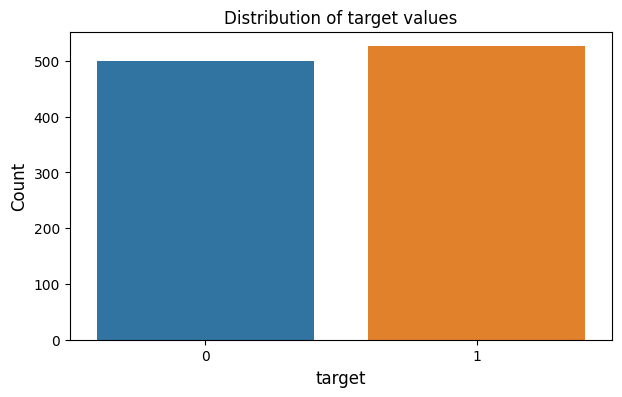

In [36]:
print(heart_df['target'].value_counts())
plt.figure(figsize=(7, 4))
sns.countplot(x = heart_df['target'])
plt.xlabel("target", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)


**#Comment:**
###The dataset seems to be balanced
###Out of 1025 patients ,526 have heart diseas and 499 they do not have.  

#3.2.4 Looking for the Correlation

<Axes: >

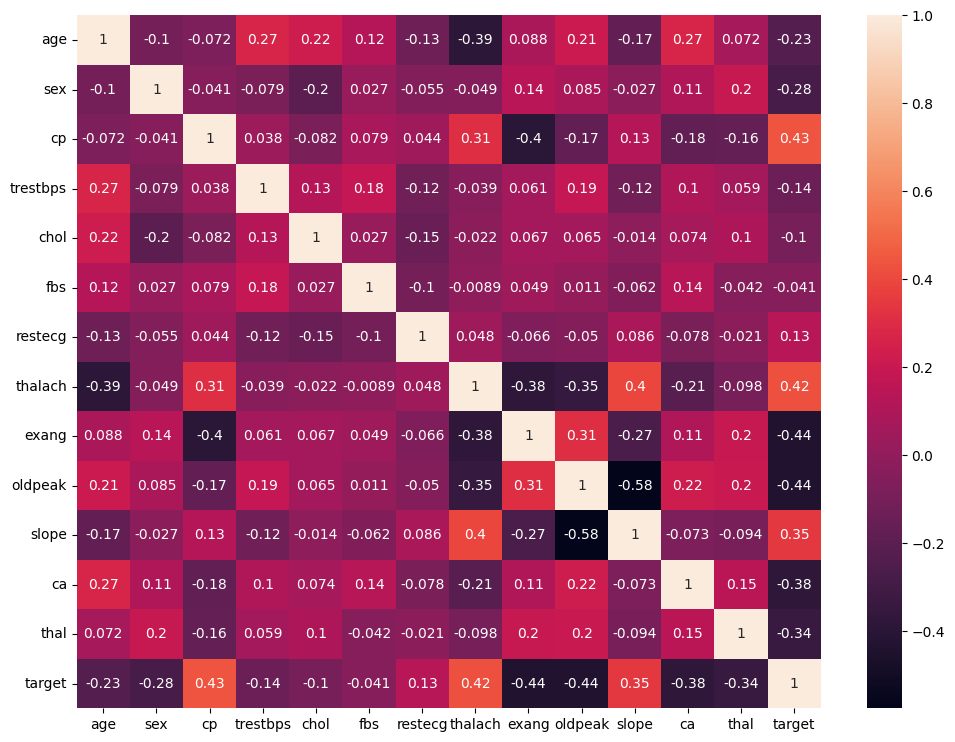

In [37]:
cor = heart_df.corr()
plt.figure(figsize = (12,9))
sns.heatmap(cor, annot = True)

**#comment:**
###There are some positive correlations between the features,for instance the chest pain and the target that is mean if someone has chest pain is likely to have heart disease. 

# 4.Building the Machine Learning Pipeline

#4.1 Creat dependent and independent Features

In [38]:
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# 4.2 Split the data into training, validation, and testing sets


In [39]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    heart_df.drop('target', axis=1), heart_df['target'], test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)


#4.3 Creat Decission Tree Model

In [40]:
dtc = DecisionTreeClassifier(random_state=42)

# 4.3.1 Decision Tree Hyperparameter tuning and gride search performing

In [41]:
dtc_param_grid = {'max_depth': [3, 5, 7, 9],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'max_features': ['sqrt', 'log2', None]}

In [14]:
dtc_grid = GridSearchCV(dtc, param_grid=dtc_param_grid, cv=5, scoring='accuracy')
dtc_grid.fit(X_train_val, y_train_val)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

# 4.3.2 Showing the best parameters and best score for Decision Tree

In [15]:
print(f"Best parameters for Decision Tree: {dtc_grid.best_params_}")
print(f"Best score for Decision Tree: {dtc_grid.best_score_}")


Best parameters for Decision Tree: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.974390243902439


#4.3.3 Train the decission tree model(dtc)

In [16]:
dtc_best = DecisionTreeClassifier(**dtc_grid.best_params_, random_state=42)
dtc_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

#4.3.4 Test the model on the validation set




In [17]:
dtc_val_preds = dtc_best.predict(X_val)
dtc_val_acc = accuracy_score(y_val, dtc_val_preds)
dtc_val_f1 = f1_score(y_val, dtc_val_preds)


#4.3.5 Predict the accuracy on the validatin set

In [18]:
print(f"Decision Tree validation accuracy: {dtc_val_acc:.3f}")
print(f"Decision Tree validation F1 score: {dtc_val_f1}")



Decision Tree validation accuracy: 0.937
Decision Tree validation F1 score: 0.9406392694063926


#4.4 Creat K-Nearest Neighbors Model(KNN)

In [19]:
knn = KNeighborsClassifier()

# 4.4.1 KNN Hyperparameter tuning and randomized search performing

In [20]:
knn_param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}

In [21]:
knn_rsearch = RandomizedSearchCV(knn, param_distributions=knn_param_grid, cv=5, scoring='accuracy', n_iter=50, random_state=42)
knn_rsearch.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

# 4.4.2 Showing the best parameters and best score for KNN

In [22]:
print(f"Best parameters for KNN: {knn_rsearch.best_params_}")
print(f"Best score for KNN: {knn_rsearch.best_score_}")



Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'euclidean'}
Best score for KNN: 0.9719512195121951


#4.4.3 Train the KNN model

In [23]:
knn_best = KNeighborsClassifier(**knn_rsearch.best_params_)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

#4.4.4 Test the KNN model on the validation set

In [24]:
knn_val_preds = knn_best.predict(X_val)
knn_val_acc = accuracy_score(y_val, knn_val_preds)
knn_val_f1 = f1_score(y_val, knn_val_preds)

#4.4.5 Predict the accuracy on the validation set

In [25]:
print(f"knn validation accuracy: {knn_val_acc:.3f}")
print(f"knn validation F1 score: {knn_val_f1}")



knn validation accuracy: 0.956
knn validation F1 score: 0.9577464788732395


#4.5 Test the best model using the test set
##According to the implemented classifiers, I found that KNN has the best performance

In [26]:
knn_test_preds = knn_best.predict(X_test)
knn_test_acc = accuracy_score(y_test, knn_test_preds)
knn_test_f1 = f1_score(y_test, knn_test_preds)

In [27]:
print(f"knn test accuracy: {knn_test_acc:.3f}")
print(f"knn test F1 score: {knn_test_f1}")



knn test accuracy: 0.966
knn test F1 score: 0.9648241206030151


#5 Conclusion
###1. Decission tree classifier accuracy is: 93%.
###2. KNeighbors Classifier accuracy is :95%.
###3. The best accuracy has been found is 96% with KNN model.

In [42]:
!jupyter nbconvert --to html ML.ipynb

[NbConvertApp] Converting notebook ML.ipynb to html
[NbConvertApp] Writing 887174 bytes to ML.html
